In [1]:
%run ..\Functions.ipynb

# Load data

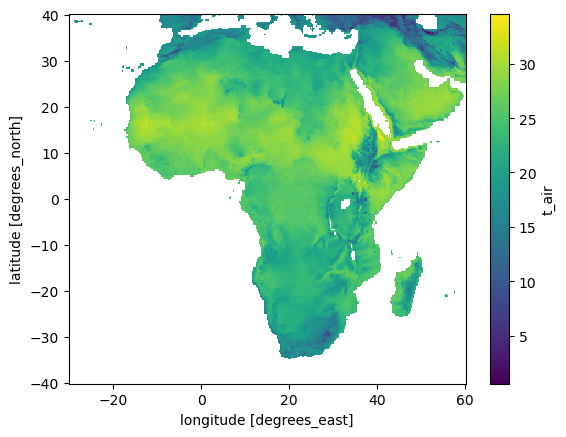

In [2]:
nc1= r"E:\WaPORQA\AgERA5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds1 = xr.open_dataset(nc1)
da1 = ds1.t_air.mean(dim='time')
da1.plot()

In [3]:
da1

<xarray.DataArray 't_air' (latitude: 321, longitude: 361)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ..., 16.92610359,
        16.78200345, 16.63302574],
       [        nan,         nan,         nan, ..., 17.28814049,
        17.25041962, 17.1966938 ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    lat        (latitude) float32 ...
    lon        (longitude) float32 ...
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0

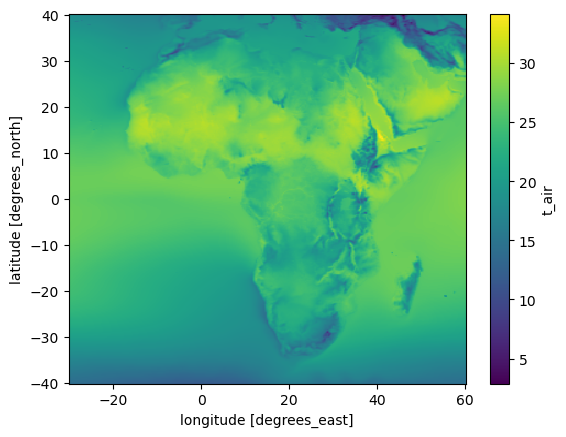

In [3]:
nc2= r"E:\WaPORQA\GEOS5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds2 = xr.open_dataset(nc2)
da2 = ds2.t_air.mean(dim='time')
da2.plot()

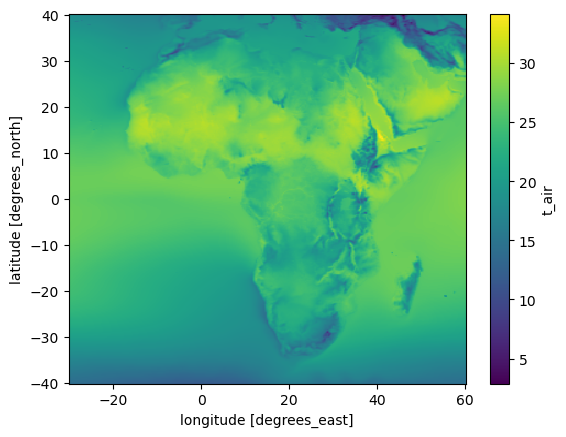

In [4]:
nc3= r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"
ds3 = xr.open_dataset(nc3)
da3 = ds3.t_air.mean(dim='time')
da2.plot()

## Test

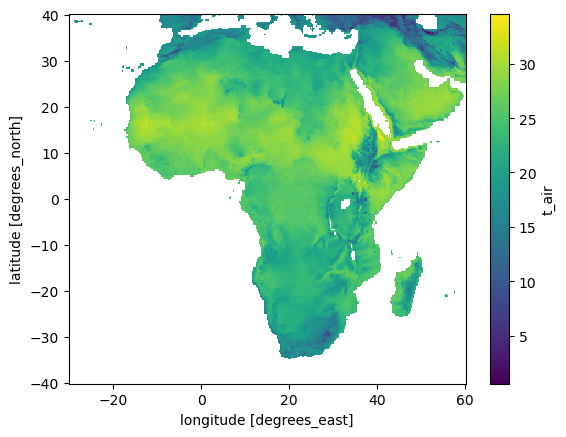

In [85]:
da1.plot()

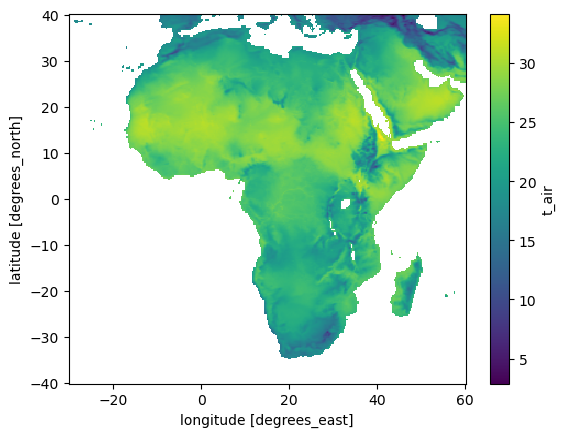

In [86]:
da2.plot()

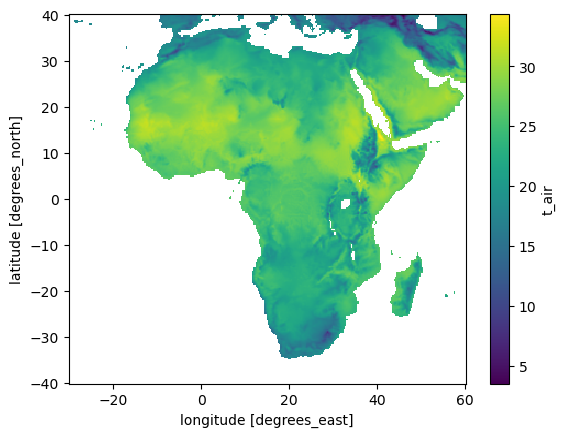

In [87]:
da3.plot()

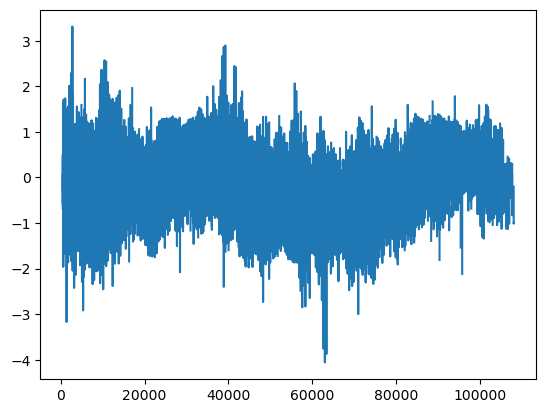

In [96]:
diff=values2-values3
plt.plot(diff)

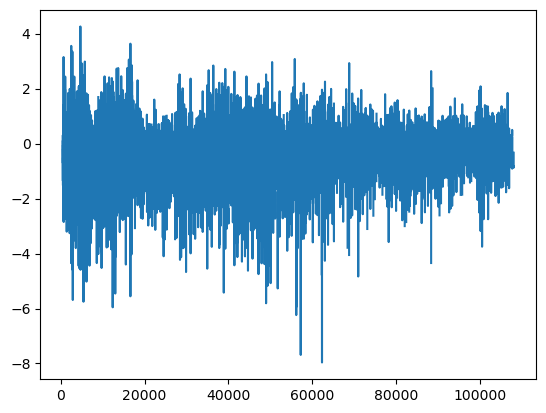

In [95]:
diff=values1-values3
plt.plot(diff)

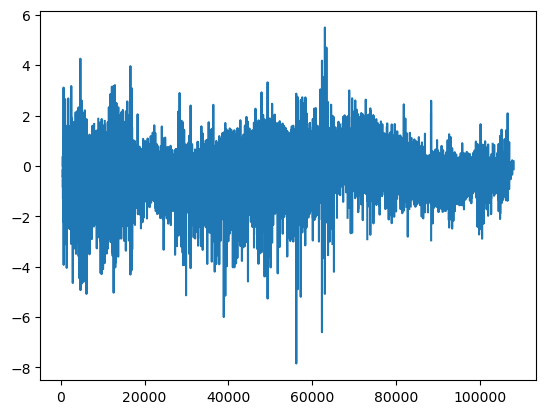

In [94]:
diff=values1-values2
plt.plot(diff)

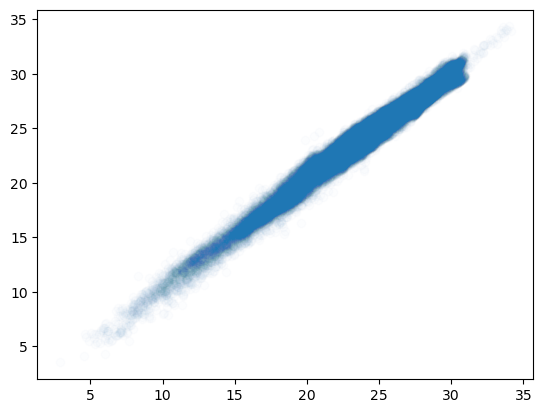

In [132]:
plt.scatter(x2,x3,alpha=0.01)

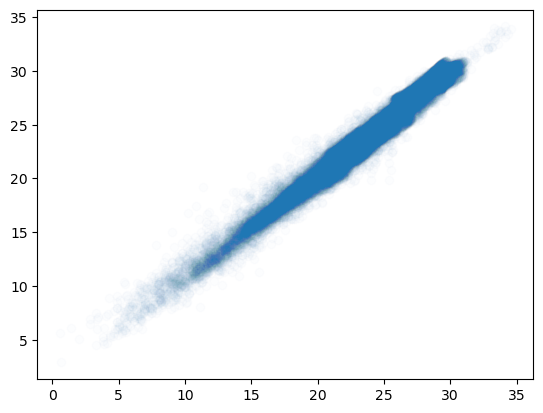

In [131]:
plt.scatter(x1,x2,alpha=0.01)

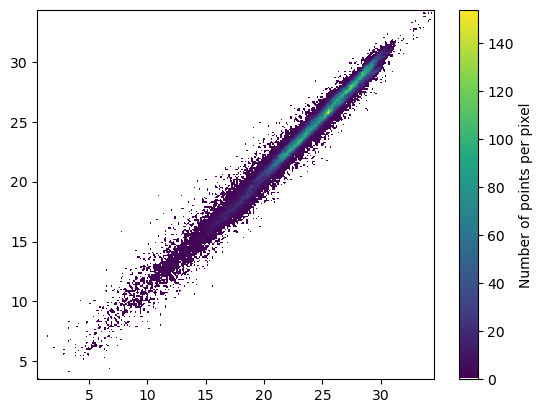

In [140]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x1, x3)
plt.show()


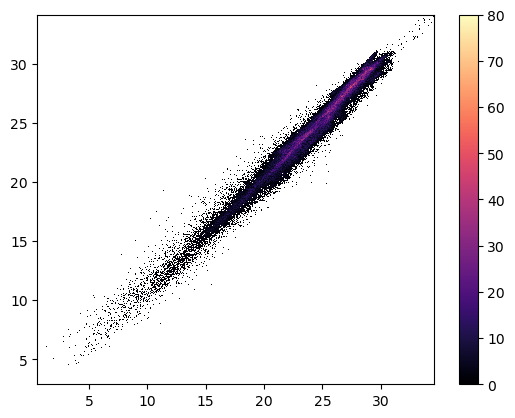

In [156]:
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd


def using_datashader(ax, x, y):

    df = pd.DataFrame(dict(x=x, y=y))
    dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        vmin=0,
        vmax=80,
        norm="linear",
        aspect="auto",
        ax=ax,
        cmap='magma'
    )

    plt.colorbar(dsartist)


fig, ax = plt.subplots()
using_datashader(ax, x1, x2)
plt.show()

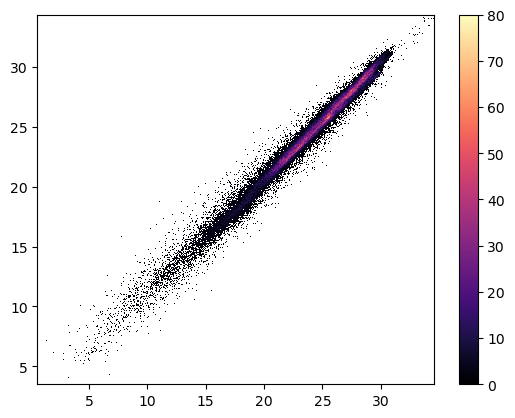

In [157]:
fig, ax = plt.subplots()
using_datashader(ax, x1, x3)
plt.show()

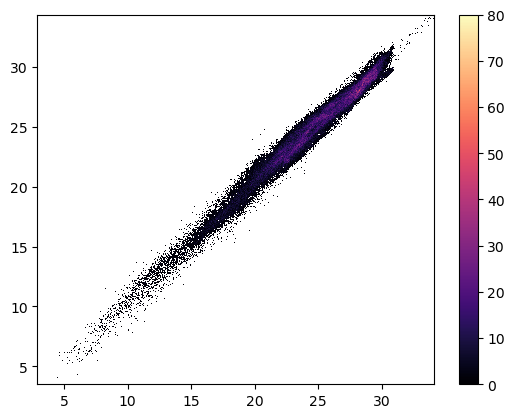

In [158]:
fig, ax = plt.subplots()
using_datashader(ax, x2, x3)
plt.show()

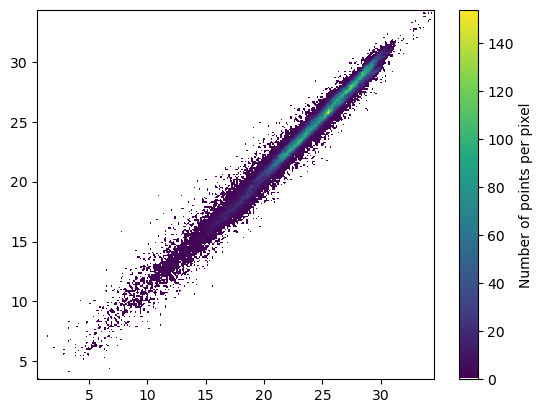

In [140]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x1, x3)
plt.show()


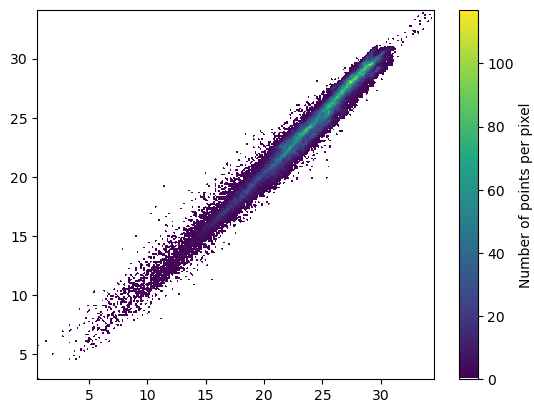

In [134]:
fig = plt.figure()
using_mpl_scatter_density(fig, x1, x2)
plt.show()

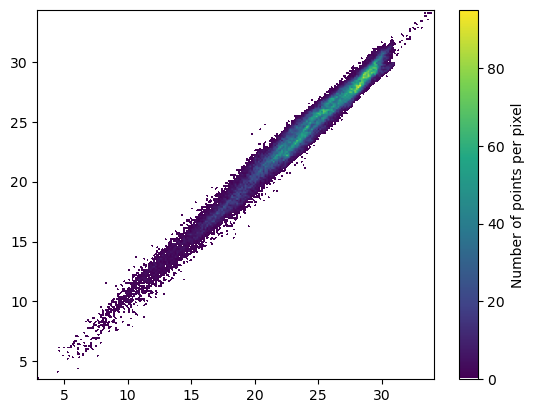

In [135]:
fig = plt.figure()
using_mpl_scatter_density(fig, x2, x3)
plt.show()

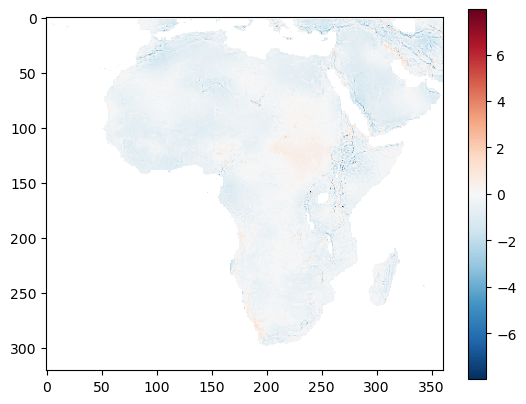

In [78]:
plt.imshow(diff1_3,vmin=-diflim, vmax=diflim, cmap='RdBu_r')
plt.colorbar()

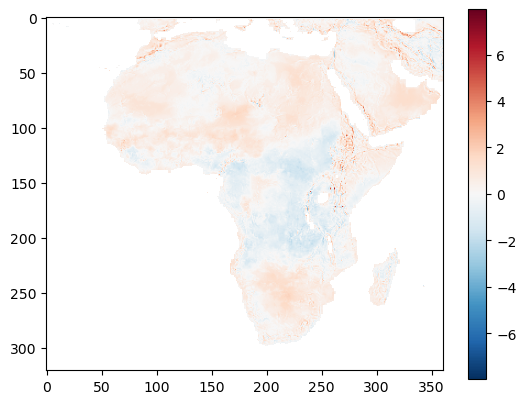

In [120]:
plt.imshow(-diff1_2,vmin=-diflim, vmax=diflim, cmap='RdBu_r')
plt.colorbar()

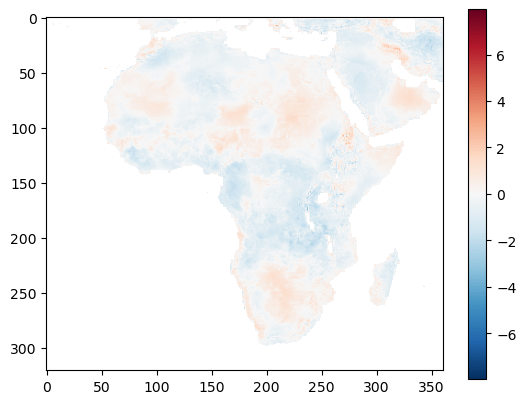

In [80]:
plt.imshow(diff2_3,vmin=-diflim, vmax=diflim, cmap='RdBu_r')
plt.colorbar()

# Graphs Matrix

In [5]:
# masked
da2=da2.where(~da1.isnull(), np.nan)
da3=da3.where(~da1.isnull(), np.nan)

# calculate difference
diff1_2=da1-da2
diff1_3=da1-da3
diff2_3=da2-da3

## Read 2D array as 1D
values1 = np.reshape(da1.values,-1) #reshape 2D to 1D array
values2 = np.reshape(da2.values,-1) #reshape 2D to 1D array
values3 = np.reshape(da3.values,-1) #reshape 2D to 1D array

x1=values1[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
x2=values2[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
x3=values3[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]

## get min and max for image plot
vmin=float(min(da1.min(),da2.min(),da3.min()))
vmax=float(max(da1.max(),da2.max(),da3.max()))
difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
diflim = max(abs(difmin),abs(difmax))

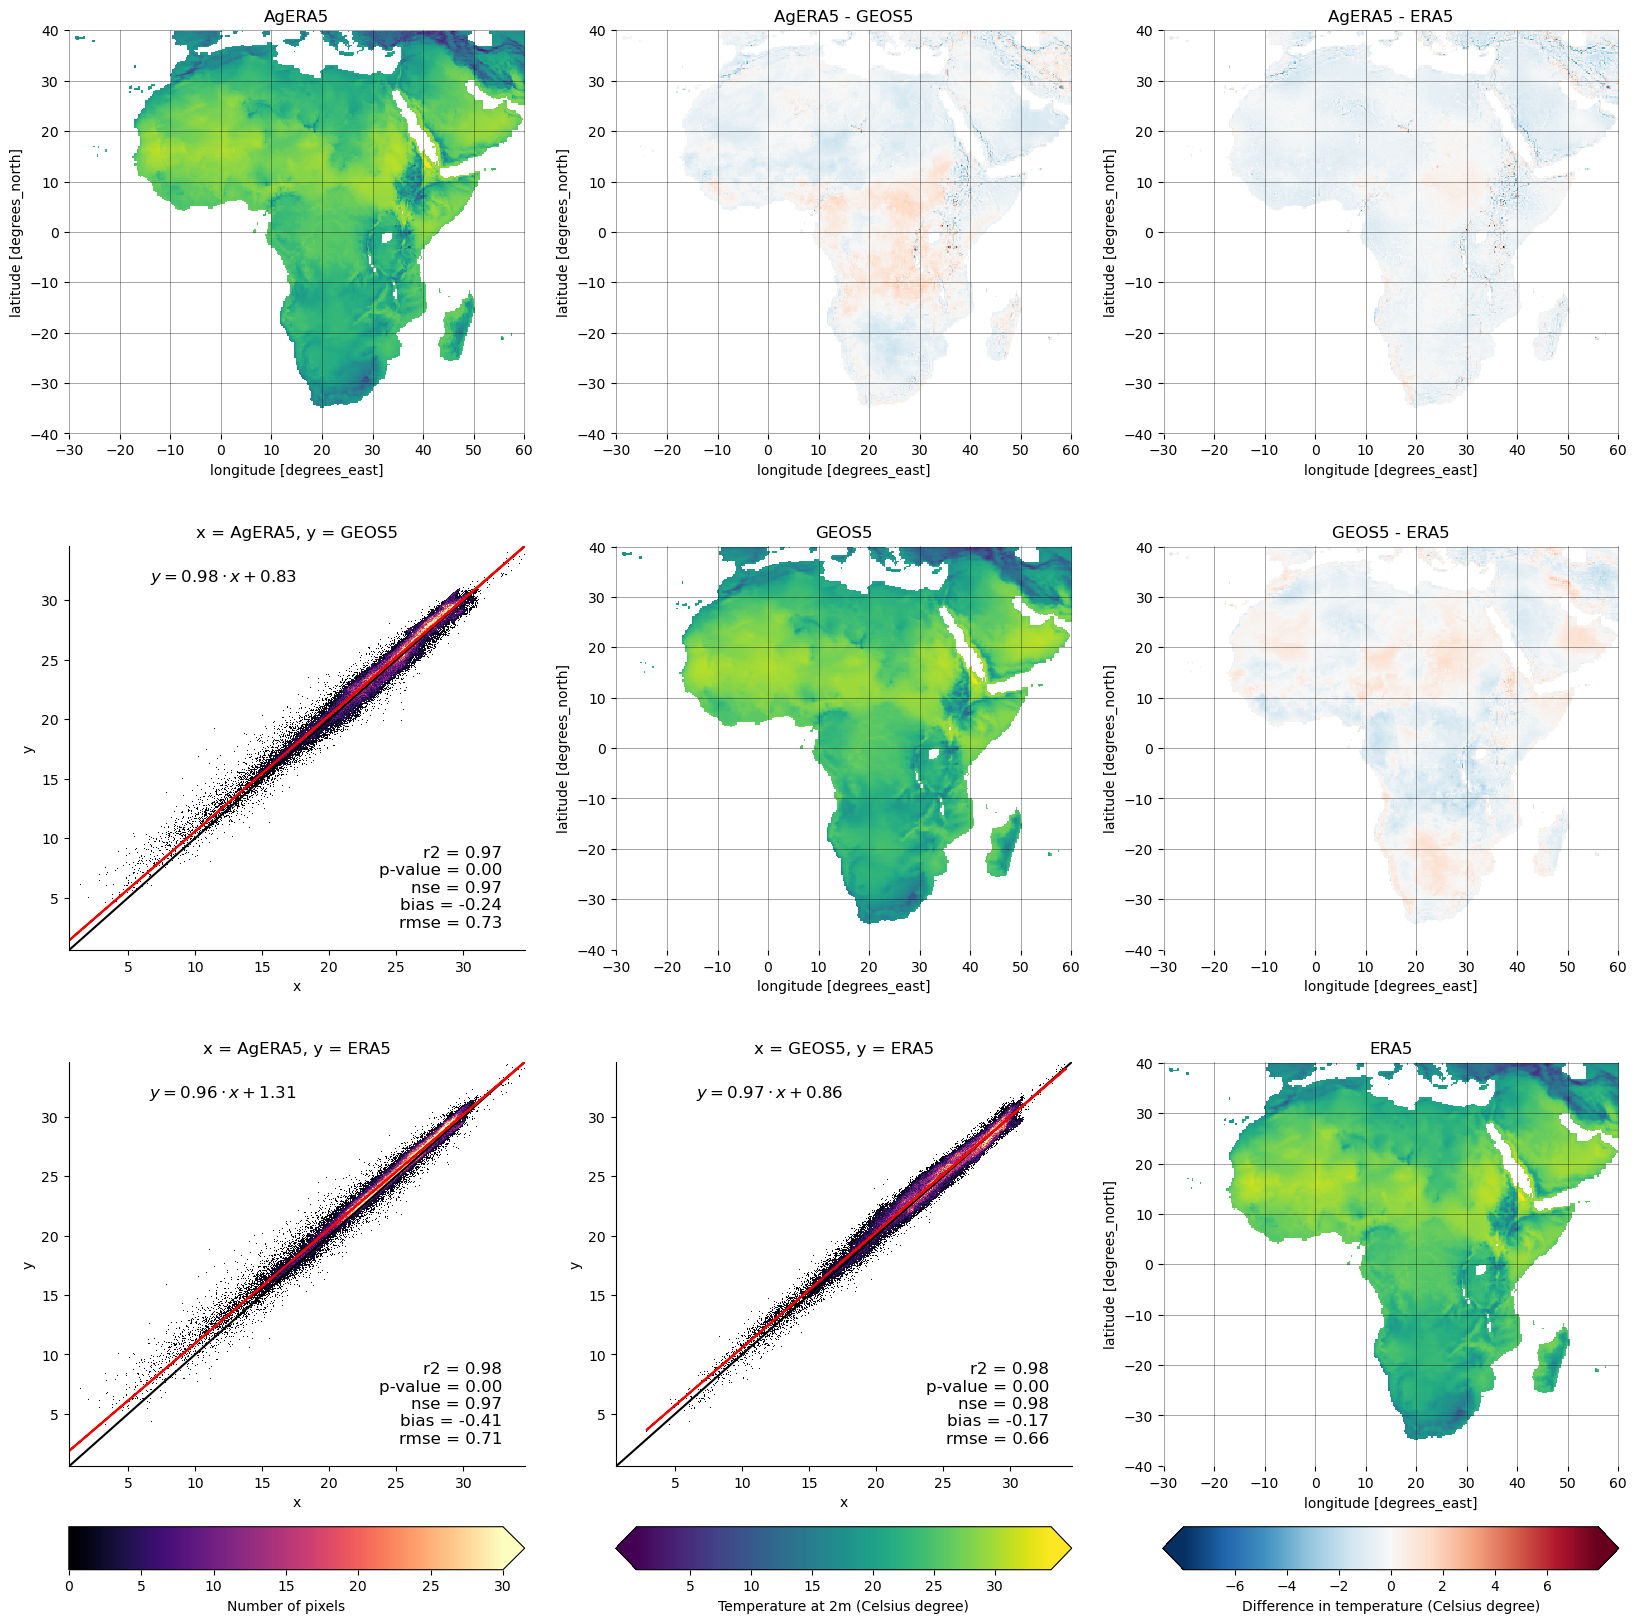

In [8]:
## Plot
### average maps
fig,diagon_axs,uptriang_axs,lotriang_axs,legends_axs = create_graph_matrix_3(figsize = [20,20])
im = subplot_image(da1, ax=diagon_axs[0], title='AgERA5', vmin=vmin, vmax=vmax)
subplot_image(da2, ax=diagon_axs[1], title='GEOS5', vmin=vmin, vmax=vmax)
subplot_image(da3, ax=diagon_axs[2], title='ERA5', vmin=vmin, vmax=vmax)
subplot_image_cbar(im, legends_axs[1], fig, label='Temperature at 2m (Celsius degree)')
### difference maps
im2 = subplot_image(diff1_2, ax=uptriang_axs[0], title='AgERA5 - GEOS5',
                   vmin=-diflim, vmax=diflim,cmap='RdBu_r')
subplot_image(diff1_3, ax=uptriang_axs[1], title='AgERA5 - ERA5',
              vmin=-diflim, vmax=diflim,cmap='RdBu_r')
subplot_image(diff2_3, ax=uptriang_axs[2], title='GEOS5 - ERA5',
              vmin=-diflim, vmax=diflim,cmap='RdBu_r')
subplot_image_cbar(im2, legends_axs[2], fig, label='Difference in temperature (Celsius degree)')
### scatter plots
_,z=subplot_density_scatter(x1,x2, ax=lotriang_axs[0],nmax=30, 
                            spines_opt=None,
                            title='x = AgERA5, y = GEOS5',
                             axlim=(vmin,vmax)
                           )
subplot_density_scatter(x1,x3, ax=lotriang_axs[1],nmax=30, 
                        spines_opt=None,
                        title='x = AgERA5, y = ERA5',
                        axlim=(vmin,vmax)
                       )
subplot_density_scatter(x2,x3, ax=lotriang_axs[2],nmax=30, 
                        spines_opt=None,
                        title='x = GEOS5, y = ERA5',
                        axlim=(vmin,vmax)
                       )
subplot_scatter_cbar(z, legends_axs[0], fig, 'Number of pixels')
plt.savefig('./figures/graphs_matrix_t_air_2018-2022.png',bbox_inches='tight')
plt.show()

In [10]:
r1=xr.corr(da2,da3)
r2=np.corrcoef(x2,x3)
print(r1)
print(r2)

<xarray.DataArray 't_air' ()>
array(0.98892027)
[[1.         0.98891513]
 [0.98891513 1.        ]]


In [11]:
diff2_3.mean()

<xarray.DataArray 't_air' ()>
array(-0.17406464)

In [12]:
err2=0
for i in range(len(x2)):
    err2+=(x2[i]-x3[i])**2
err2**(1/2)

148.55347572738296

## relative difference

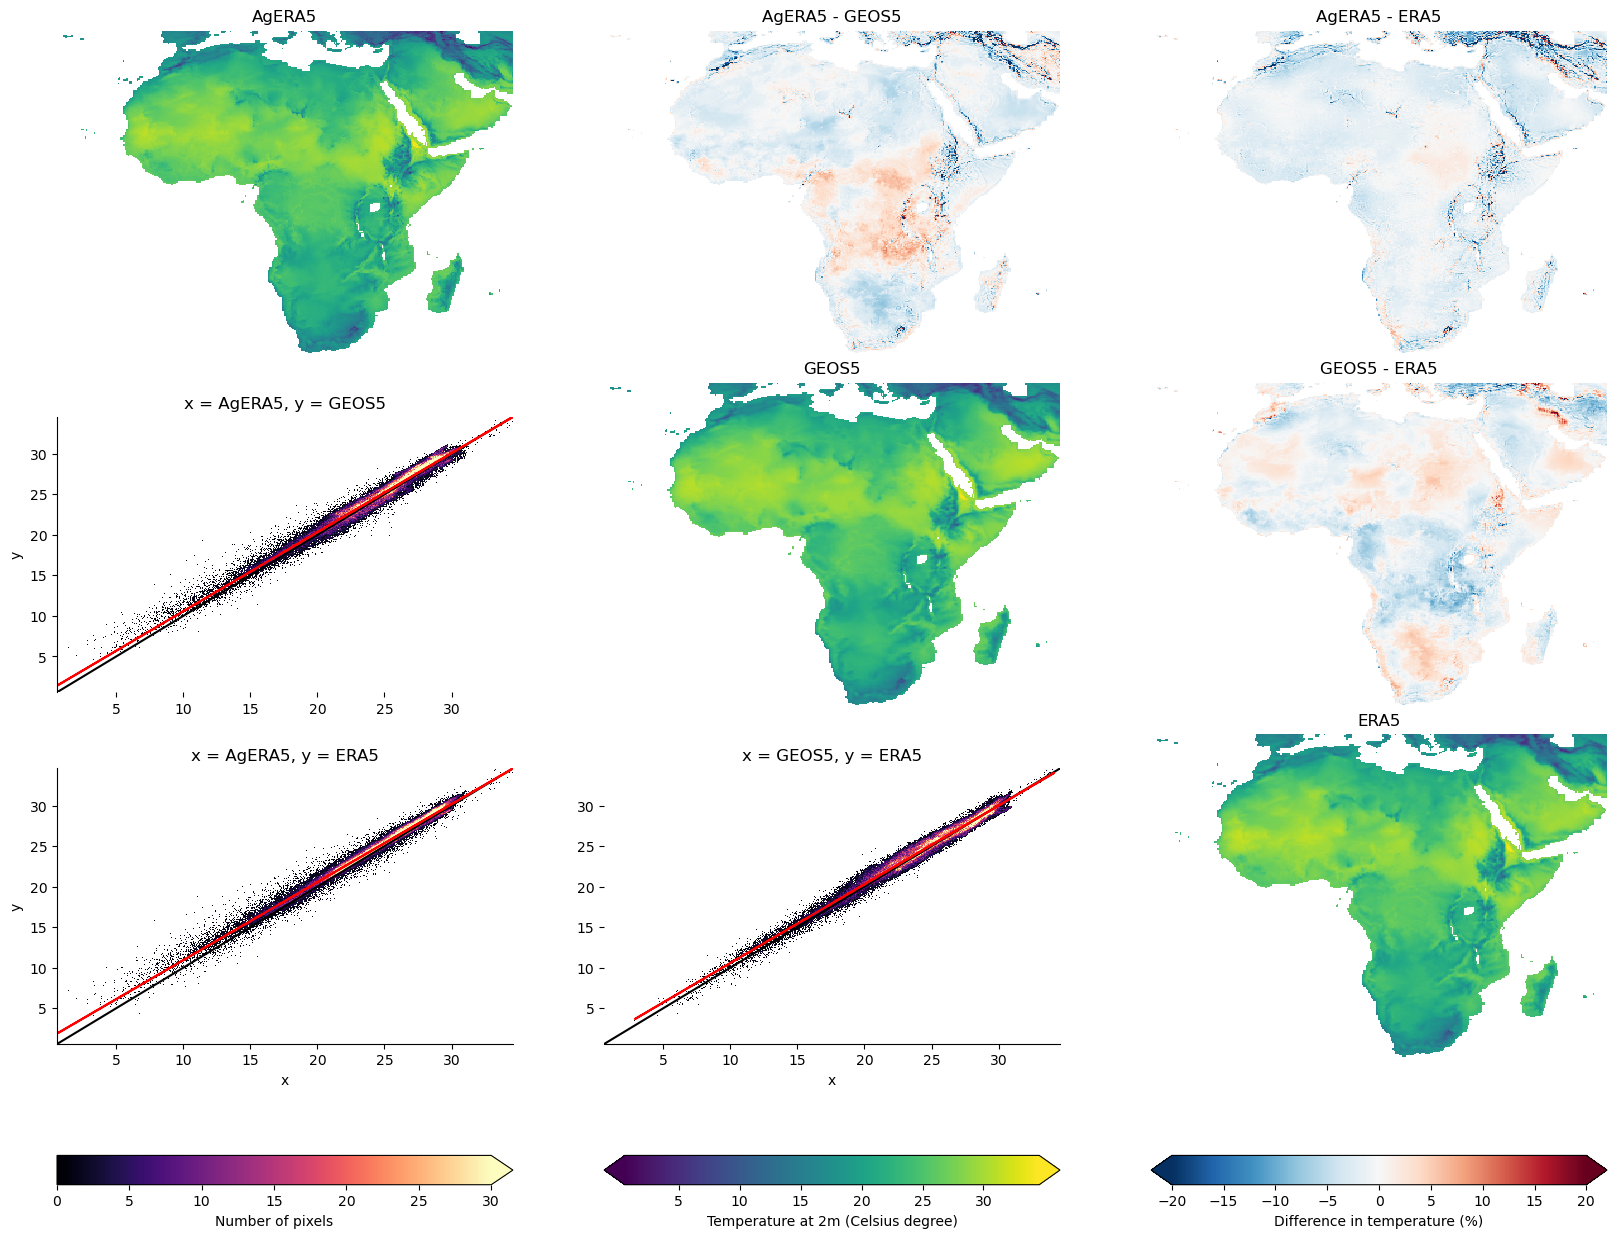

In [129]:
# calculate difference (%)
diff1_2=(da1-da2)*100/((da1+da2)/2)
diff1_3=(da1-da3)*100/((da1+da3)/2)
diff2_3=(da2-da3)*100/((da3+da2)/2)

## Plot
### average maps
fig,diagon_axs,uptriang_axs,lotriang_axs,legends_axs = create_graph_matrix_3(figsize = [20,15])
im = subplot_image(da1, ax=diagon_axs[0], title='AgERA5', vmin=vmin, vmax=vmax)
subplot_image(da2, ax=diagon_axs[1], title='GEOS5', vmin=vmin, vmax=vmax)
subplot_image(da3, ax=diagon_axs[2], title='ERA5', vmin=vmin, vmax=vmax)
subplot_image_cbar(im, legends_axs[1], fig, label='Temperature at 2m (Celsius degree)')
### difference maps
im2 = subplot_image(diff1_2, ax=uptriang_axs[0], title='AgERA5 - GEOS5',
                    vmin=-20, vmax=20,cmap='RdBu_r')
subplot_image(diff1_3, ax=uptriang_axs[1], title='AgERA5 - ERA5',
              vmin=-20, vmax=20,cmap='RdBu_r')
subplot_image(diff2_3, ax=uptriang_axs[2], title='GEOS5 - ERA5',
              vmin=-20, vmax=20,cmap='RdBu_r')
subplot_image_cbar(im2, legends_axs[2], fig, label='Difference in temperature (%)')
### scatter plots
_,z=subplot_density_scatter(x1,x2, ax=lotriang_axs[0],nmax=30, 
                            spines_opt=0,
                            title='x = AgERA5, y = GEOS5',
                             axlim=(vmin,vmax)
                           )
subplot_density_scatter(x1,x3, ax=lotriang_axs[1],nmax=30, 
                        spines_opt=None,
                        title='x = AgERA5, y = ERA5',
                        axlim=(vmin,vmax)
                       )
subplot_density_scatter(x2,x3, ax=lotriang_axs[2],nmax=30, 
                        spines_opt=1,
                        title='x = GEOS5, y = ERA5',
                        axlim=(vmin,vmax)
                       )
subplot_scatter_cbar(z, legends_axs[0], fig, 'Number of pixels')
# plt.savefig('./figures/graphs_matrix_t_air_2018-2022.png',bbox_inches='tight')
plt.show()

# Hovmoller

In [3]:
folder=r"E:\WaPORQA\AgERA5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da1 = ds.t_air

folder=r"E:\WaPORQA\ERA5\Processed\Monthly"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da2 = ds.t_air

folder=r"E:\WaPORQA\GEOS5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da3 = ds.t_air

da2=da2.where(~da1.isnull(), np.nan)
da3=da3.where(~da1.isnull(), np.nan)

diff1_2=(da1-da2)
diff1_3=(da1-da3)
diff2_3=(da2-da3)

diff1_2.compute()
diff1_3.compute()
diff2_3.compute()

<xarray.DataArray 't_air' (time: 60, latitude: 321, longitude: 361)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.71267401,
          0.69775509,         nan],
        [        nan,         nan,         nan, ...,  0.52546191,
          0.42756481,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  1.17066936,
          1.19182248,         nan],
        [        nan,         nan,         nan, ...,  1.22012   ,
          1.0339633 ,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.17999668,
         -1.21959097, -1.19901165],
        [        nan,         nan,         nan, ..., -0.84762073,
         -0.93259045, -0.8801631 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2022-12-31
    lat        (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
    lon        (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0

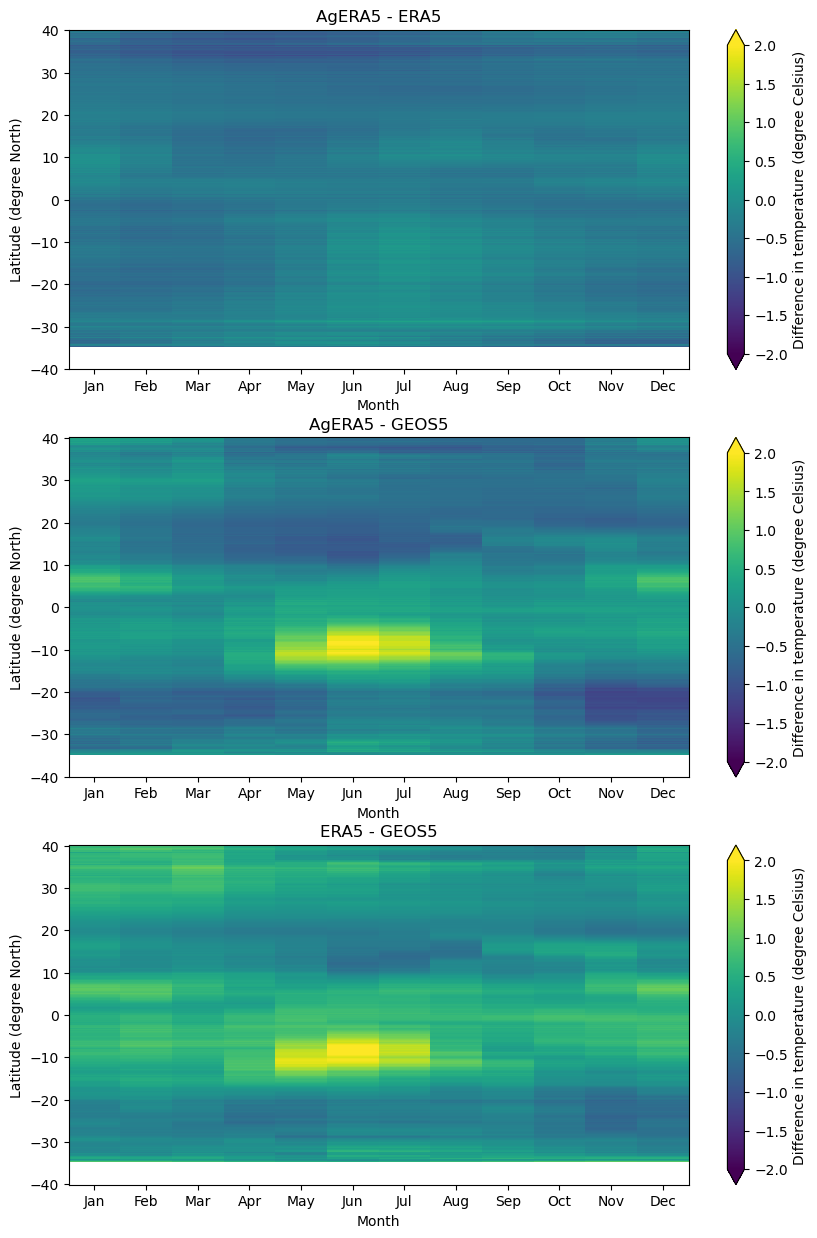

In [3]:
fig, axs = plt.subplots(3,1,figsize=(10, 15))
plot_hovmoller_month(diff1_2, title = 'AgERA5 - ERA5', ax= axs[0],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
              vmin=-2,vmax=2)
plot_hovmoller_month(diff1_3, title = 'AgERA5 - GEOS5', ax= axs[1],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
                vmin=-2,vmax=2)
plot_hovmoller_month(diff2_3, title = 'ERA5 - GEOS5', ax= axs[2],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
                vmin=-2,vmax=2)
plt.savefig('./figures/hovmoller_t_air_2018-2022.png',bbox_inches='tight')
plt.show()

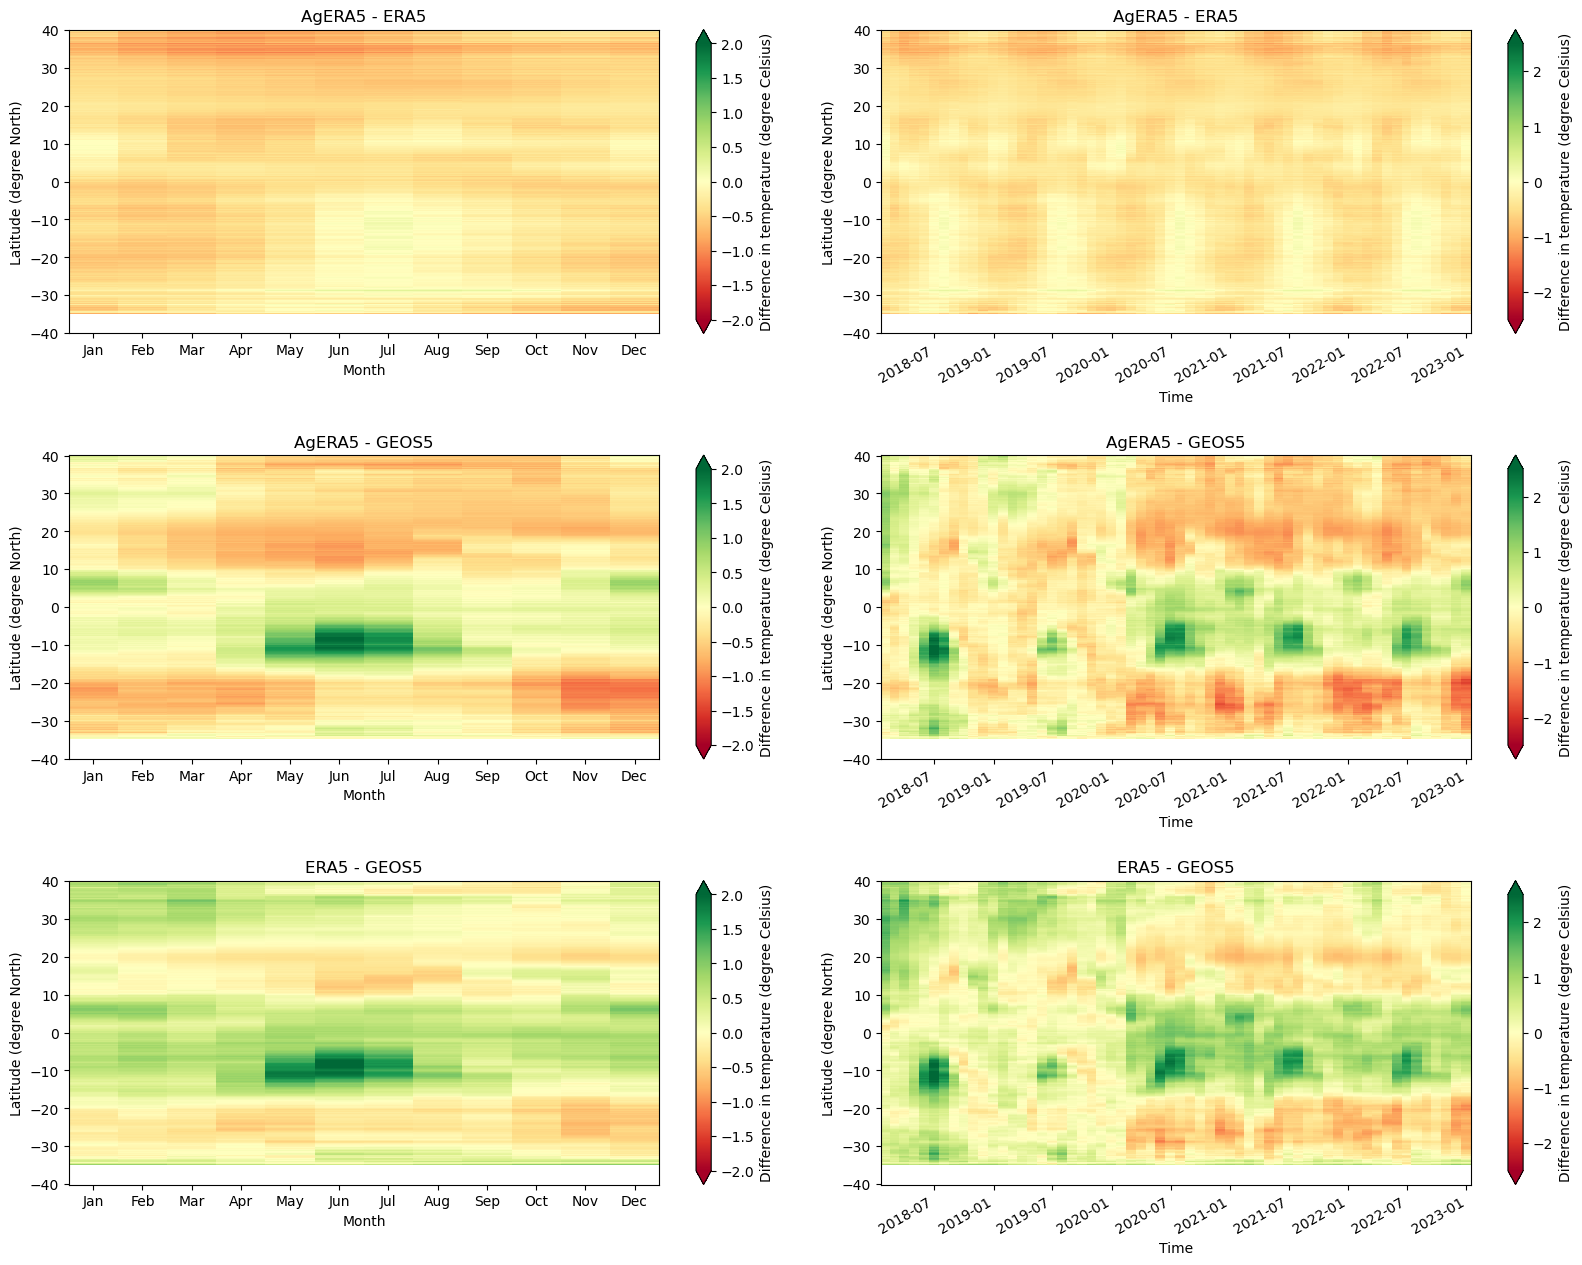

In [43]:
fig, axs = plt.subplots(3,2,figsize=(20, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plot_hovmoller_month(diff1_2, title = 'AgERA5 - ERA5', ax= axs[0,0],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
              vmin=-2,vmax=2
                    )
plot_hovmoller(diff1_2, title = 'AgERA5 - ERA5', ax= axs[0,1],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
              vmin=-2.5,vmax=2.5
              )
plot_hovmoller_month(diff1_3, title = 'AgERA5 - GEOS5', ax= axs[1,0],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
                 vmin=-2,vmax=2
                    )
plot_hovmoller(diff1_3, title = 'AgERA5 - GEOS5', ax= axs[1,1],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
                vmin=-2.5,vmax=2.5
              )
plot_hovmoller_month(diff2_3, title = 'ERA5 - GEOS5', ax= axs[2,0],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
                 vmin=-2,vmax=2
                    )
plot_hovmoller(diff2_3, title = 'ERA5 - GEOS5', ax= axs[2,1],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
             vmin=-2.5,vmax=2.5
              )
plt.savefig('./figures/hovmoller_t_air_2018-2022.png',bbox_inches='tight')
plt.show()